# Unsupervised machine learning with k-means clustering 

It is no surprise that news of Califonia's longest drought season (2011-2019) and reccord breaking temperatures have led to some of the worst wildfires the state has seen. 

By analyzing factors that contribute to these fires, high temperatures and precipitation, counties at risk of developing wildfires may be predicted. 

In [2]:
import urllib.request # to open urls and creating requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Obtain the data
Data for the wildfires was scrapped from Wikipedia for the last 10 years (2021 to 2010). The list represents fires that burned more than 1,000 acres (400 ha), or produced significant structural damage or casualties. 

These tables are listed as:
- table_21
- table_20
- table_19
- table_18
etc.

In [3]:
url = "https://en.wikipedia.org/wiki/2020_California_wildfires"
tables = pd.read_html(url)
print("There are : ",len(tables)," tables")

There are :  8  tables


In [106]:
print(tables[2])

                                                 Name  \
0                                        Interstate 5   
1                                               Range   
2                                            Scorpion   
3                                               Quail   
4                                                Wood   
5                                               India   
6                                                Soda   
7                                               Grant   
8                                              Walker   
9                                               Grade   
10                                               Pass   
11                                               Bena   
12                                              Crews   
13                                            Soledad   
14                                            Mineral   
15                                             Coyote   
16                             

In [107]:
table_20 = tables[2]
table_20.head()

Name           County  Acres Start date Containment date  \
0  Interstate 5            Kings   2060      May 3            May 7   
1         Range  San Luis Obispo   5000     May 27           May 28   
2      Scorpion    Santa Barbara   1395     May 31           June 1   
3         Quail           Solano   1837     June 6          June 10   
4          Wood        San Diego  11000     June 8          June 12   

                      Notes       Ref  
0                       NaN      [29]  
1                       NaN      [30]  
2                       NaN      [31]  
3    3 structures destroyed  [32][33]  
4  Burned on Camp Pendleton      [34]

In [108]:
# add a column to label the year the fire occurred
table_20['year'] = '2020'
table_20.head()

Name           County  Acres Start date Containment date  \
0  Interstate 5            Kings   2060      May 3            May 7   
1         Range  San Luis Obispo   5000     May 27           May 28   
2      Scorpion    Santa Barbara   1395     May 31           June 1   
3         Quail           Solano   1837     June 6          June 10   
4          Wood        San Diego  11000     June 8          June 12   

                      Notes       Ref  year  
0                       NaN      [29]  2020  
1                       NaN      [30]  2020  
2                       NaN      [31]  2020  
3    3 structures destroyed  [32][33]  2020  
4  Burned on Camp Pendleton      [34]  2020

In [109]:
table_21.head()

Name       County  Acres Start date Containment date  \
0      Owens         Kern   1512      May 1            May 7   
1   Southern    San Diego   5366      May 2            May 6   
2  Palisades  Los Angeles   1202     May 14           May 26   
3   Sargents     Monterey   1100     May 30           June 2   
4     Sierra    San Diego   1000     June 9          June 12   

                                               Notes           Ref  year  
0                                      Unknown cause  [21][22][23]  2021  
1                             4 structures destroyed      [24][22]  2021  
2  Human-caused, suspected arson; 1 firefighter i...          [25]  2021  
3                                      Unknown cause          [26]  2021  
4                                                NaN      [27][28]  2021

Weather data was downloaded from [NOAA](https://www.ncdc.noaa.gov/cag/county/mapping/4/tavg/202003/12/value) for both precipitation and temperature for the state of California. The bulk download contains the average monthly temp/precipitation for the last 127 years. Only the temperatures for the years 2021-2010 were used.

In [93]:
temp = pd.read_csv("C:\\Users\\willd\\Google Drive\\Data Analysis\\Projects\\Fires_clustering\\avg_temps_CA.csv")
temp.head()

Location ID          Location    Date  temp  Rank  \
0      CA-001    Alameda County  202106  69.2   122   
1      CA-003     Alpine County  202106  61.0   127   
2      CA-005     Amador County  202106  74.3   127   
3      CA-007      Butte County  202106  76.5   125   
4      CA-009  Calaveras County  202106  74.4   126   

   Anomaly (1901-2000 base period)  1901-2000 Mean  
0                              4.2            65.0  
1                              7.7            53.3  
2                              7.0            67.3  
3                              6.4            70.1  
4                              6.6            67.8

In [94]:
precip = pd.read_csv("C:\\Users\\willd\\Google Drive\\Data Analysis\\Projects\\Fires_clustering\\avg_precip_CA.csv")
precip.head()

Location ID          Location    Date  inches  Rank  \
0      CA-001    Alameda County  202106    0.02    57   
1      CA-003     Alpine County  202106    0.68    69   
2      CA-005     Amador County  202106    0.22    59   
3      CA-007      Butte County  202106    0.07    32   
4      CA-009  Calaveras County  202106    0.22    71   

   Anomaly (1901-2000 base period)  1901-2000 Mean  
0                            -0.12            0.14  
1                            -0.15            0.83  
2                            -0.26            0.48  
3                            -0.56            0.63  
4                            -0.19            0.41

# Cleaning the data


Append the year to tables 19-21

In [114]:
table_21['Start date'] = table_21['Start date'] + ', 2021'
table_21.head()

Name       County  Acres    Start date Containment date  \
0      Owens         Kern   1512   May 1, 2021            May 7   
1   Southern    San Diego   5366   May 2, 2021            May 6   
2  Palisades  Los Angeles   1202  May 14, 2021           May 26   
3   Sargents     Monterey   1100  May 30, 2021           June 2   
4     Sierra    San Diego   1000  June 9, 2021          June 12   

                                               Notes           Ref  year  
0                                      Unknown cause  [21][22][23]  2021  
1                             4 structures destroyed      [24][22]  2021  
2  Human-caused, suspected arson; 1 firefighter i...          [25]  2021  
3                                      Unknown cause          [26]  2021  
4                                                NaN      [27][28]  2021

In [112]:
table_20['Containment date'] = table_20['Containment date'] + ', 2020'
table_20.head()

Name           County  Acres    Start date Containment date  \
0  Interstate 5            Kings   2060   May 3, 2020      May 7, 2020   
1         Range  San Luis Obispo   5000  May 27, 2020     May 28, 2020   
2      Scorpion    Santa Barbara   1395  May 31, 2020     June 1, 2020   
3         Quail           Solano   1837  June 6, 2020    June 10, 2020   
4          Wood        San Diego  11000  June 8, 2020    June 12, 2020   

                      Notes       Ref  year  
0                       NaN      [29]  2020  
1                       NaN      [30]  2020  
2                       NaN      [31]  2020  
3    3 structures destroyed  [32][33]  2020  
4  Burned on Camp Pendleton      [34]  2020

In [162]:
# Clean the column names of the tables
# define a function to standardize the column names.
def clean_col(col):
    col = col.strip()
    col = col.replace(" ", "_")
    col = col.lower()
    return col

new_col = []
for i in table_10.columns:
    c_new = clean_col(i)
    new_col.append(c_new)

table_10.columns = new_col

In [151]:
table_21.columns

Index(['name', 'county', 'acres', 'start_date', 'containment_date', 'notes',
       'ref', 'year'],
      dtype='object')

In [158]:
table_12.columns

Index(['name', 'county', 'acres', 'km2', 'start_date', 'containment_date',
       'notes', 'year'],
      dtype='object')

In [156]:
# rename tables 10-13 column contained_date to containment_date
table_10.rename({"contained_date" : "containment_date"}, axis = 1, inplace = True)
table_11.rename({"contained_date" : "containment_date"}, axis = 1, inplace = True)
table_12.rename({"contained_date" : "containment_date"}, axis = 1, inplace = True)
table_13.rename({"contained_date" : "containment_date"}, axis = 1, inplace = True)

Merge the tables into one dataframe:

In [354]:
# concatinate the wildfire tables into one table
wildfires = pd.concat([table_10, table_11, table_12, table_13, table_14, table_15, table_16, table_17,
                      table_18, table_19, table_20, table_21])

wildfires = pd.DataFrame(wildfires)
wildfires

name  \
0                                              Cotton   
1                                            McKinley   
2                                            Robinson   
3                                               Aliso   
4                                              Sand 2   
5                                              Indian   
6                                                Mono   
7                                                Bull   
8                                            McDonald   
9                                                West   
10                                              Crown   
11                                                Bar   
12                                               Pozo   
13                                               Post   
14                                            Bullard   
15                                           Bullards   
16                                             Canyon   
0                                                Cove   
1                                              Cougar   
2                                            Antelope   
3                                               Quinn   
4                                               Stage   
5                                                Lion   
6                                    Scorpion Complex   
7                                               Eagle   
8                                               Annie   
9                                               Motor   
10                                              Wells   
11                                               Hill   
12                                               Soda   
13                                             Canyon   
14                                             Milton   
15                                      Keene Complex   
16                                   Comanche Complex   
17                               Breckenridge Complex   
18                                               John   
19                                           Tamarack   
20                                            65 Fire   
21                                               Ruth   
22                                            Buckeye   
23                                              Great   
0                                              Banner   
1                                              George   
2                                              Gaines   
3                                            Highland   
4                                             Cascade   
5                                                Dale   
6                                                Fish   
7                                                Mill   
8                                           Grapevine   
9                                                Rail   
10                                             Turkey   
11                                            Robbers   
12                                               Flat   
13                                               Sand   
14                                            Spanish   
15                                            Reading   
16                                              Chips   
17                                           Rushmore   
18                                       Piute Comlex   
19                                       Lake Complex   
20                                       Fort Complex   
21                                        Barry Point   
22                                             Indian   
23                                          Chihuahua   
24                                    Jawbone Complex   
25                                             Ramsey   
26                                                Wye   
27                                             Walker   
28                                               Rush   
29

In [355]:
# remove the km2 column and ref column from the wildfires
wildfires = wildfires.iloc[:, [0,1,2,4,5,7]]
wildfires.head()

name           county  acres     start_date containment_date  year
0    Cotton  San Luis Obispo   2044   May 15, 2010     May 17, 2010  2010
1  McKinley        Riverside   1000   May 20, 2010     May 22, 2010  2010
2  Robinson           Merced   1600  June 11, 2010    June 12, 2010  2010
3     Aliso        San Diego   3225  July 13, 2010    July 13, 2010  2010
4    Sand 2             Kern   1254  July 16, 2010    July 22, 2010  2010

## Tidy the temp & precip dataframes and merge them together

In [173]:
temp.columns

Index(['Location ID', 'Location', 'Date', 'temp', 'Rank',
       'Anomaly (1901-2000 base period)', '1901-2000 Mean'],
      dtype='object')

In [175]:
# tidy the column names for the temp and precip dataframes
new_col = []
for i in precip.columns:
    c_new = clean_col(i)
    new_col.append(c_new)

precip.columns = new_col
precip.columns

Index(['location_id', 'location', 'date', 'inches', 'rank',
       'anomaly_(1901-2000_base_period)', '1901-2000_mean'],
      dtype='object')

In [179]:
precip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8004 entries, 0 to 8003
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   location_id                      8004 non-null   object 
 1   location                         8004 non-null   object 
 2   date                             8004 non-null   int64  
 3   inches                           8004 non-null   float64
 4   rank                             8004 non-null   int64  
 5   anomaly_(1901-2000_base_period)  8004 non-null   float64
 6   1901-2000_mean                   8004 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 437.8+ KB


In [182]:
# observe the listed counties in the temp dataframe
temp['location'].unique()

array(['Alameda County', 'Alpine County', 'Amador County', 'Butte County',
       'Calaveras County', 'Colusa County', 'Contra Costa County',
       'Del Norte County', 'El Dorado County', 'Fresno County',
       'Glenn County', 'Humboldt County', 'Imperial County',
       'Inyo County', 'Kern County', 'Kings County', 'Lake County',
       'Lassen County', 'Los Angeles County', 'Madera County',
       'Marin County', 'Mariposa County', 'Mendocino County',
       'Merced County', 'Modoc County', 'Mono County', 'Monterey County',
       'Napa County', 'Nevada County', 'Orange County', 'Placer County',
       'Plumas County', 'Riverside County', 'Sacramento County',
       'San Benito County', 'San Bernardino County', 'San Diego County',
       'San Francisco County', 'San Joaquin County',
       'San Luis Obispo County', 'San Mateo County',
       'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County',
       'Shasta County', 'Sierra County', 'Siskiyou County',
       'Solano 

In [188]:
# remove the word County from the temp & precip dataframes to match that of the wildfires dataframe
temp['location'] = temp['location'].str.replace('County', '')
temp.head()

location_id    location    date  temp  rank  \
0      CA-001    Alameda   202106  69.2   122   
1      CA-003     Alpine   202106  61.0   127   
2      CA-005     Amador   202106  74.3   127   
3      CA-007      Butte   202106  76.5   125   
4      CA-009  Calaveras   202106  74.4   126   

   anomaly_(1901-2000_base_period)  1901-2000_mean  
0                              4.2            65.0  
1                              7.7            53.3  
2                              7.0            67.3  
3                              6.4            70.1  
4                              6.6            67.8

In [189]:
precip['location'] = precip['location'].str.replace('County', '')
precip.head()

location_id    location    date  inches  rank  \
0      CA-001    Alameda   202106    0.02    57   
1      CA-003     Alpine   202106    0.68    69   
2      CA-005     Amador   202106    0.22    59   
3      CA-007      Butte   202106    0.07    32   
4      CA-009  Calaveras   202106    0.22    71   

   anomaly_(1901-2000_base_period)  1901-2000_mean  
0                            -0.12            0.14  
1                            -0.15            0.83  
2                            -0.26            0.48  
3                            -0.56            0.63  
4                            -0.19            0.41

In [190]:
# we only need the location, date and temp or inches columns from the precip and temp dataframes
temp = temp.iloc[:, [1,2,3]]
precip = precip.iloc[:, 1:4]
precip.head()

location    date  inches
0    Alameda   202106    0.02
1     Alpine   202106    0.68
2     Amador   202106    0.22
3      Butte   202106    0.07
4  Calaveras   202106    0.22

In [325]:
# merge the temp & precip dataframes by innerjoining them
weather = pd.merge(left=temp, right=precip, on=['location', 'date'], how='left')
weather = pd.DataFrame(weather)
weather

location    date  temp  inches
0             Alameda   202106  69.2    0.02
1              Alpine   202106  61.0    0.68
2              Amador   202106  74.3    0.22
3               Butte   202106  76.5    0.07
4           Calaveras   202106  74.4    0.22
5              Colusa   202106  78.3    0.03
6        Contra Costa   202106  70.4    0.01
7           Del Norte   202106  64.1    2.75
8           El Dorado   202106  70.3    0.16
9              Fresno   202106  72.5    0.02
10              Glenn   202106  76.9    0.09
11           Humboldt   202106  66.5    1.41
12           Imperial   202106  92.1    0.01
13               Inyo   202106  82.2    0.01
14               Kern   202106  80.0    0.03
15              Kings   202106  80.6    0.00
16               Lake   202106  71.5    0.06
17             Lassen   202106  66.8    0.40
18        Los Angeles   202106  74.1    0.00
19             Madera   202106  73.4    0.14
20              Marin   202106  61.5    0.02
21           Mariposa   202106  72.5    0.35
22          Mendocino   202106  66.8    0.24
23             Merced   202106  76.8    0.01
24              Modoc   202106  66.6    0.31
25               Mono   202106  63.3    0.48
26           Monterey   202106  68.8    0.00
27               Napa   202106  71.2    0.00
28             Nevada   202106  69.1    0.08
29             Orange   202106  69.8    0.00
30             Placer   202106  70.4    0.07
31             Plumas   202106  65.2    0.17
32          Riverside   202106  86.2    0.06
33         Sacramento   202106  75.9    0.00
34         San Benito   202106  71.3    0.01
35     San Bernardino   202106  87.3    0.06
36          San Diego   202106  75.0    0.01
37      San Francisco   202106  62.7    0.14
38        San Joaquin   202106  74.3    0.00
39    San Luis Obispo   202106  71.0    0.00
40          San Mateo   202106  63.3    0.14
41      Santa Barbara   202106  67.1    0.00
42        Santa Clara   202106  68.7    0.03
43         Santa Cruz   202106  64.4    0.03
44             Shasta   202106  73.2    0.10
45             Sierra   202106  64.7    0.13
46           Siskiyou   202106  66.2    0.59
47             Solano   202106  72.6    0.00
48             Sonoma   202106  65.3    0.01
49         Stanislaus   202106  75.1    0.02
50             Sutter   202106  79.2    0.00
51             Tehama   202106  75.6    0.13
52            Trinity   202106  68.8    0.46
53             Tulare   202106  71.8    0.00
54           Tuolumne   202106  66.6    0.85
55            Ventura   202106  67.8    0.00
56               Yolo   202106  76.1    0.00
57               Yuba   202106  77.3    0.03
58            Alameda   202105  63.2    0.01
59             Alpine   202105  48.1    1.03
60             Amador   202105  64.7    0.54
61              Butte   202105  67.9    0.10
62          Calaveras   202105  65.0    0.27
63             Colusa   202105  71.0    0.01
64       Contra Costa   202105  65.4    0.01
65          Del Norte   202105  56.3    0.69
66          El Dorado   202105  59.5    0.65
67             Fresno   202105  62.2    0.04
68              Glenn   202105  69.0    0.03
69           Humboldt   202105  57.8    0.34
70           Imperial   202105  79.7    0.00
71               Inyo   202105  69.0    0.01
72               Kern   202105  68.8    0.00
73              Kings   202105  70.9    0.00
74               Lake   202105  63.7    0.01
75             Lassen   202105  53.3    0.41
76        Los Angeles   202105  65.4    0.02
77             Madera   202105  62.9    0.13
78              Marin   202105  58.2    0.00
79           Mariposa   202105  61.5    0.19
80          Mendocino   202105  60.1    0.05
81             Merced   202105  68.8    0.00
82              Modoc   202105  52.9    0.48
83               Mono   202105  50.1    0.46
84           Monterey   202105  61.6    0.01
85               Napa   202105  65.2    0.01
86             Nevada   202105  58.6    0.42
87             Orange   202105  64.6    0.08
88       

Converting the date column in the weather dataframe to a datetime object will help us extract the year for each row and allow us to analyze according to year.

In [353]:
# convert the date column to a string
weather['date'] = weather['date'].astype(str)

# convert the date column to a datetime format
weather['date'] = pd.to_datetime(weather['date'], format='%Y%m')

# Extract the year from the date column into a new column 'year'
weather['year'] = pd.DatetimeIndex(weather['date']).year

# extract the month into a new column
weather['month'] = pd.DatetimeIndex(weather['date']).month

weather.head()

location       date  temp  inches  year  month
0    Alameda  2021-06-01  69.2    0.02  2021      6
1     Alpine  2021-06-01  61.0    0.68  2021      6
2     Amador  2021-06-01  74.3    0.22  2021      6
3      Butte  2021-06-01  76.5    0.07  2021      6
4  Calaveras  2021-06-01  74.4    0.22  2021      6

In [367]:
weather

location       date  temp  inches  year  month
0             Alameda  2021-06-01  69.2    0.02  2021      6
1              Alpine  2021-06-01  61.0    0.68  2021      6
2              Amador  2021-06-01  74.3    0.22  2021      6
3               Butte  2021-06-01  76.5    0.07  2021      6
4           Calaveras  2021-06-01  74.4    0.22  2021      6
5              Colusa  2021-06-01  78.3    0.03  2021      6
6        Contra Costa  2021-06-01  70.4    0.01  2021      6
7           Del Norte  2021-06-01  64.1    2.75  2021      6
8           El Dorado  2021-06-01  70.3    0.16  2021      6
9              Fresno  2021-06-01  72.5    0.02  2021      6
10              Glenn  2021-06-01  76.9    0.09  2021      6
11           Humboldt  2021-06-01  66.5    1.41  2021      6
12           Imperial  2021-06-01  92.1    0.01  2021      6
13               Inyo  2021-06-01  82.2    0.01  2021      6
14               Kern  2021-06-01  80.0    0.03  2021      6
15              Kings  2021-06-01  80.6    0.00  2021      6
16               Lake  2021-06-01  71.5    0.06  2021      6
17             Lassen  2021-06-01  66.8    0.40  2021      6
18        Los Angeles  2021-06-01  74.1    0.00  2021      6
19             Madera  2021-06-01  73.4    0.14  2021      6
20              Marin  2021-06-01  61.5    0.02  2021      6
21           Mariposa  2021-06-01  72.5    0.35  2021      6
22          Mendocino  2021-06-01  66.8    0.24  2021      6
23             Merced  2021-06-01  76.8    0.01  2021      6
24              Modoc  2021-06-01  66.6    0.31  2021      6
25               Mono  2021-06-01  63.3    0.48  2021      6
26           Monterey  2021-06-01  68.8    0.00  2021      6
27               Napa  2021-06-01  71.2    0.00  2021      6
28             Nevada  2021-06-01  69.1    0.08  2021      6
29             Orange  2021-06-01  69.8    0.00  2021      6
30             Placer  2021-06-01  70.4    0.07  2021      6
31             Plumas  2021-06-01  65.2    0.17  2021      6
32          Riverside  2021-06-01  86.2    0.06  2021      6
33         Sacramento  2021-06-01  75.9    0.00  2021      6
34         San Benito  2021-06-01  71.3    0.01  2021      6
35     San Bernardino  2021-06-01  87.3    0.06  2021      6
36          San Diego  2021-06-01  75.0    0.01  2021      6
37      San Francisco  2021-06-01  62.7    0.14  2021      6
38        San Joaquin  2021-06-01  74.3    0.00  2021      6
39    San Luis Obispo  2021-06-01  71.0    0.00  2021      6
40          San Mateo  2021-06-01  63.3    0.14  2021      6
41      Santa Barbara  2021-06-01  67.1    0.00  2021      6
42        Santa Clara  2021-06-01  68.7    0.03  2021      6
43         Santa Cruz  2021-06-01  64.4    0.03  2021      6
44             Shasta  2021-06-01  73.2    0.10  2021      6
45             Sierra  2021-06-01  64.7    0.13  2021      6
46           Siskiyou  2021-06-01  66.2    0.59  2021      6
47             Solano  2021-06-01  72.6    0.00  2021      6
48             Sonoma  2021-06-01  65.3    0.01  2021      6
49         Stanislaus  2021-06-01  75.1    0.02  2021      6
50             Sutter  2021-06-01  79.2    0.00  2021      6
51             Tehama  2021-06-01  75.6    0.13  2021      6
52            Trinity  2021-06-01  68.8    0.46  2021      6
53             Tulare  2021-06-01  71.8    0.00  2021      6
54           Tuolumne  2021-06-01  66.6    0.85  2021      6
55            Ventura  2021-06-01  67.8    0.00  2021      6
56               Yolo  2021-06-01  76.1    0.00  2021      6
57               Yuba  2021-06-01  77.3    0.03  2021      6
58            Alameda  2021-05-01  63.2    0.01  2021      5
59             Alpine  2021-05-01  48.1    1.03  2021      5
60             Amador  2021-05-01  64.7    0.54  2021      5
61              Butte  2021-05-01  67.9    0.10  2021      5
62          Calaveras  2021-05-01  65.0    0.27  2021      5
63             Colusa  2021-05-01  71.0    0.01  2021      5
64       Contra Costa  2021-05-01  65.4    0.01  

In [368]:
# generate a separate dataframe for the average temp and inches 
weather_avg = weather.groupby(['location', 'year', 'month']).mean().reset_index()
weather_avg

location  year  month  temp  inches
0             Alameda   2010      1  48.4    5.38
1             Alameda   2010      2  51.1    2.73
2             Alameda   2010      3  52.5    2.20
3             Alameda   2010      4  53.2    3.12
4             Alameda   2010      5  57.7    0.72
5             Alameda   2010      6  66.3    0.01
6             Alameda   2010      7  68.7    0.00
7             Alameda   2010      8  67.6    0.00
8             Alameda   2010      9  69.1    0.01
9             Alameda   2010     10  62.3    1.07
10            Alameda   2010     11  52.7    2.52
11            Alameda   2010     12  49.8    5.41
12            Alameda   2011      1  48.2    1.04
13            Alameda   2011      2  48.0    3.47
14            Alameda   2011      3  51.7    5.65
15            Alameda   2011      4  54.7    0.26
16            Alameda   2011      5  57.6    0.81
17            Alameda   2011      6  64.2    0.71
18            Alameda   2011      7  69.1    0.01
19            Alameda   2011      8  69.0    0.00
20            Alameda   2011      9  70.1    0.00
21            Alameda   2011     10  63.2    1.32
22            Alameda   2011     11  51.7    1.15
23            Alameda   2011     12  47.6    0.11
24            Alameda   2012      1  49.4    2.08
25            Alameda   2012      2  50.9    0.84
26            Alameda   2012      3  51.2    4.40
27            Alameda   2012      4  56.8    2.73
28            Alameda   2012      5  62.0    0.03
29            Alameda   2012      6  66.0    0.14
30            Alameda   2012      7  69.2    0.01
31            Alameda   2012      8  71.0    0.00
32            Alameda   2012      9  68.1    0.00
33            Alameda   2012     10  63.2    0.79
34            Alameda   2012     11  55.6    3.95
35            Alameda   2012     12  47.7    5.81
36            Alameda   2013      1  45.8    0.81
37            Alameda   2013      2  48.8    0.47
38            Alameda   2013      3  55.2    0.63
39            Alameda   2013      4  60.0    0.69
40            Alameda   2013      5  63.0    0.07
41            Alameda   2013      6  68.3    0.12
42            Alameda   2013      7  71.1    0.00
43            Alameda   2013      8  69.8    0.00
44            Alameda   2013      9  68.1    0.54
45            Alameda   2013     10  61.3    0.01
46            Alameda   2013     11  55.2    1.31
47            Alameda   2013     12  47.0    0.43
48            Alameda   2014      1  53.2    0.11
49            Alameda   2014      2  52.5    3.83
50            Alameda   2014      3  56.9    2.02
51            Alameda   2014      4  58.8    1.36
52            Alameda   2014      5  64.7    0.02
53            Alameda   2014      6  68.1    0.01
54            Alameda   2014      7  72.7    0.01
55            Alameda   2014      8  70.9    0.01
56            Alameda   2014      9  70.0    0.39
57            Alameda   2014     10  66.2    0.47
58            Alameda   2014     11  56.7    1.75
59            Alameda   2014     12  52.7    9.90
60            Alameda   2015      1  51.2    0.01
61            Alameda   2015      2  55.7    2.25
62            Alameda   2015      3  59.1    0.26
63            Alameda   2015      4  58.0    1.15
64            Alameda   2015      5  59.2    0.37
65            Alameda   2015      6  69.4    0.27
66            Alameda   2015      7  71.6    0.01
67            Alameda   2015      8  71.7    0.02
68            Alameda   2015      9  71.2    0.04
69            Alameda   2015     10  67.3    0.08
70            Alameda   2015     11  51.2    2.41
71            Alameda   2015     12  47.0    3.52
72            Alameda   2016      1  50.0    5.65
73            Alameda   2016      2  55.2    0.84
74            Alameda   2016      3  55.1    5.25
75            Alameda   2016      4  59.1    1.94
76            Alameda   2016      5  62.8    0.24
77            Alameda   2016      6  69.4    0.00
78            Alameda   2016      7  70.5    0.00
79            

In [ ]:
# generate a separate dataframe for the average temp and inches by month.

### Tidying the wildfires dataframe

In [356]:
# observe how many unique county names there are
wildfires.value_counts('county')

county
Kern                                                                   32
San Diego                                                              31
Riverside                                                              26
Los Angeles                                                            21
Siskiyou                                                               19
Lassen                                                                 17
Shasta                                                                 17
San Luis Obispo                                                        16
Mariposa                                                               15
Modoc                                                                  15
Monterey                                                               15
Tulare                                                                 15
San Bernardino                                                         13
Fresno                         

There are rows in the wildfires dataframe with multiple counties. Keep only the first listed county in a separate list and copy this new list to the county column in the wildfires dataframe.

In [357]:
counties = []

for i in wildfires['county']:
    if ',' in i:
        c = i.split(',')[0]
        counties.append(c)
    else:
        counties.append(i)

counties

['San Luis Obispo',
 'Riverside',
 'Merced',
 'San Diego',
 'Kern',
 'Kern',
 'Mono',
 'Kern',
 'Lassen',
 'Kern',
 'Los Angeles',
 'Plumas',
 'San Luis Obispo',
 'Kern',
 'Yuba',
 'Nevada',
 'Kern',
 'Kern',
 'Modoc',
 'Kern',
 'Kern',
 'Tulare',
 'Tulare',
 'Modoc',
 'San Diego',
 'Modoc',
 'Mariposa',
 'San Bernardino',
 'San Bernardino',
 'San Luis Obispo',
 'Kern',
 'San Joaquin',
 'Kern',
 'Kern',
 'Kern',
 'Inyo',
 'Mariposa',
 'Kern',
 'Trinity',
 'Mono',
 'San Diego',
 'San Diego',
 'Tulare',
 'Mariposa',
 'Riverside',
 'Mariposa',
 'Shasta',
 'Inyo',
 'Colusa',
 'Colusa',
 'Colusa',
 'Monterey',
 'Placer',
 'Trinity',
 'Kern',
 'Lassen',
 'Shasta',
 'Plumas',
 'Riverside',
 'Kern',
 'Modoc',
 'Siskiyou',
 'Modoc',
 'Mono',
 'San Diego',
 'Kern',
 'Calaveras',
 'Lake',
 'Lake',
 'Lassen',
 'San Diego',
 'Tehama',
 'Riverside',
 'Modoc',
 'Tehama',
 'Shasta',
 'Mendocino',
 'Shasta',
 'Los Angeles',
 'Colusa',
 'Trinity',
 'Lassen',
 'Lake',
 'San Diego',
 'Tehama',
 'Riverside

In [358]:
wildfires

name  \
0                                              Cotton   
1                                            McKinley   
2                                            Robinson   
3                                               Aliso   
4                                              Sand 2   
5                                              Indian   
6                                                Mono   
7                                                Bull   
8                                            McDonald   
9                                                West   
10                                              Crown   
11                                                Bar   
12                                               Pozo   
13                                               Post   
14                                            Bullard   
15                                           Bullards   
16                                             Canyon   
0                                                Cove   
1                                              Cougar   
2                                            Antelope   
3                                               Quinn   
4                                               Stage   
5                                                Lion   
6                                    Scorpion Complex   
7                                               Eagle   
8                                               Annie   
9                                               Motor   
10                                              Wells   
11                                               Hill   
12                                               Soda   
13                                             Canyon   
14                                             Milton   
15                                      Keene Complex   
16                                   Comanche Complex   
17                               Breckenridge Complex   
18                                               John   
19                                           Tamarack   
20                                            65 Fire   
21                                               Ruth   
22                                            Buckeye   
23                                              Great   
0                                              Banner   
1                                              George   
2                                              Gaines   
3                                            Highland   
4                                             Cascade   
5                                                Dale   
6                                                Fish   
7                                                Mill   
8                                           Grapevine   
9                                                Rail   
10                                             Turkey   
11                                            Robbers   
12                                               Flat   
13                                               Sand   
14                                            Spanish   
15                                            Reading   
16                                              Chips   
17                                           Rushmore   
18                                       Piute Comlex   
19                                       Lake Complex   
20                                       Fort Complex   
21                                        Barry Point   
22                                             Indian   
23                                          Chihuahua   
24                                    Jawbone Complex   
25                                             Ramsey   
26                                                Wye   
27                                             Walker   
28                                               Rush   
29

In [359]:
# replace the county column in wildfires with the counties list
wildfires.loc[:,'county'] = counties
wildfires

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


name                 county  \
0                                              Cotton        San Luis Obispo   
1                                            McKinley              Riverside   
2                                            Robinson                 Merced   
3                                               Aliso              San Diego   
4                                              Sand 2                   Kern   
5                                              Indian                   Kern   
6                                                Mono                   Mono   
7                                                Bull                   Kern   
8                                            McDonald                 Lassen   
9                                                West                   Kern   
10                                              Crown            Los Angeles   
11                                                Bar                 Plumas   
12                                               Pozo        San Luis Obispo   
13                                               Post                   Kern   
14                                            Bullard                   Yuba   
15                                           Bullards                 Nevada   
16                                             Canyon                   Kern   
0                                                Cove                   Kern   
1                                              Cougar                  Modoc   
2                                            Antelope                   Kern   
3                                               Quinn                   Kern   
4                                               Stage                 Tulare   
5                                                Lion                 Tulare   
6                                    Scorpion Complex                  Modoc   
7                                               Eagle              San Diego   
8                                               Annie                  Modoc   
9                                               Motor               Mariposa   
10                                              Wells         San Bernardino   
11                                               Hill         San Bernardino   
12                                               Soda        San Luis Obispo   
13                                             Canyon                   Kern   
14                                             Milton            San Joaquin   
15                                      Keene Complex                   Kern   
16                                   Comanche Complex                   Kern   
17                               Breckenridge Complex                   Kern   
18                                               John                   Inyo   
19                                           Tamarack               Mariposa   
20                                            65 Fire                   Kern   
21                                               Ruth                Trinity   
22                                            Buckeye                   Mono   
23                                              Great              San Diego   
0                                              Banner              San Diego   
1                                              George                 Tulare   
2                                              Gaines               Mariposa   
3                                            Highland              Riverside   
4                                             Cascade               Mariposa   
5                                                Dale                 Shasta   
6                                                Fish                   Inyo   
7                                                Mill                 Colusa   
8                                           Grape

We can create a separate dataframe where the total acerage burned in a year and in a month can be used in plotting.

In [361]:
# convert the start_date to a datetime format and extract the month
wildfires['start_date'] = pd.to_datetime(wildfires['start_date'], format='%B %d, %Y')
wildfires.head()

name           county  acres start_date containment_date  year
0    Cotton  San Luis Obispo   2044 2010-05-15     May 17, 2010  2010
1  McKinley        Riverside   1000 2010-05-20     May 22, 2010  2010
2  Robinson           Merced   1600 2010-06-11    June 12, 2010  2010
3     Aliso        San Diego   3225 2010-07-13    July 13, 2010  2010
4    Sand 2             Kern   1254 2010-07-16    July 22, 2010  2010

In [363]:
# extract the month into a new column 
wildfires['month'] = pd.DatetimeIndex(wildfires['start_date']).month
wildfires.head()

name           county  acres start_date containment_date  year  month
0    Cotton  San Luis Obispo   2044 2010-05-15     May 17, 2010  2010      5
1  McKinley        Riverside   1000 2010-05-20     May 22, 2010  2010      5
2  Robinson           Merced   1600 2010-06-11    June 12, 2010  2010      6
3     Aliso        San Diego   3225 2010-07-13    July 13, 2010  2010      7
4    Sand 2             Kern   1254 2010-07-16    July 22, 2010  2010      7

# Exploratory Data Analysis
We can observe how frequent wildfires are in each county and in each year.

In [352]:
fires_total = wildfires.groupby(['county', 'year', 'month']).sum().reset_index()
fires_total.head()

county  year  month  acres
0  Alameda  2015      8   2700
1   Alpine  2020      8  26759
2   Alpine  2021      6   1320
3   Alpine  2021      7  69832
4   Amador  2015      9  70868

In [246]:
# sum the total number of acres burned per county
county_acres = wildfires.groupby('county').sum().reset_index()

county_acres

county    acres
0                 Alameda     2700
1                  Alpine    97911
2                  Amador    70868
3                   Butte   452878
4               Calaveras     4381
5                  Colusa   415462
6            Contra Costa     3100
7               Del Norte    68495
8               El Dorado   107065
9                  Fresno   666006
10               Glendora     1723
11                  Glenn  1034938
12               Humboldt   238895
13                   Inyo    31892
14                   Kern   234891
15                  Kings     5055
16                   Lake   269565
17          Lake and Napa    25118
18                 Lassen   599376
19            Los Angeles   397450
20                 Madera    44056
21                  Marin     4929
22               Mariposa   237742
23              Mendocino   551264
24                 Merced    11112
25                  Modoc   302926
26                   Mono    73071
27               Monterey   341932
28                   Napa    82325
29            Napa/Solano    51624
30            Napa/Sonoma    36807
31                 Nevada     3026
32                 Orange    65199
33                 Placer    31823
34                 Plumas   589340
35              Riverside   142048
36             Sacramento     5042
37             San Benito     2886
38         San Bernardino   156871
39              San Diego   150528
40            San Joaquin    13422
41        San Luis Obispo   106411
42              San Mateo    86509
43          Santa Barbara    77646
44            Santa Clara   406611
45             Santa Cruz      391
46                 Shasta   633472
47               Siskiyou   754495
48                 Solano    10199
49                 Sonoma   158383
50             Stanislaus     2422
51                 Sutter     2500
52                 Tehama    74907
53                Trinity   135224
54                 Tulare   291191
55               Tuolumne   300828
56                Ventura    47279
57  Ventura/Santa Barbara   281893
58                   Yolo    17000
59                   Yuba    12607

In [250]:
# sort the acres column so the bargraph will be sorted in descending order.
county_sorted = county_acres.sort_values('acres')
county_sorted

county    acres
45             Santa Cruz      391
10               Glendora     1723
50             Stanislaus     2422
51                 Sutter     2500
0                 Alameda     2700
37             San Benito     2886
31                 Nevada     3026
6            Contra Costa     3100
4               Calaveras     4381
21                  Marin     4929
36             Sacramento     5042
15                  Kings     5055
48                 Solano    10199
24                 Merced    11112
59                   Yuba    12607
40            San Joaquin    13422
58                   Yolo    17000
17          Lake and Napa    25118
33                 Placer    31823
13                   Inyo    31892
30            Napa/Sonoma    36807
20                 Madera    44056
56                Ventura    47279
29            Napa/Solano    51624
32                 Orange    65199
7               Del Norte    68495
2                  Amador    70868
26                   Mono    73071
52                 Tehama    74907
43          Santa Barbara    77646
28                   Napa    82325
42              San Mateo    86509
1                  Alpine    97911
41        San Luis Obispo   106411
8               El Dorado   107065
53                Trinity   135224
35              Riverside   142048
39              San Diego   150528
38         San Bernardino   156871
49                 Sonoma   158383
14                   Kern   234891
22               Mariposa   237742
12               Humboldt   238895
16                   Lake   269565
57  Ventura/Santa Barbara   281893
54                 Tulare   291191
55               Tuolumne   300828
25                  Modoc   302926
27               Monterey   341932
19            Los Angeles   397450
44            Santa Clara   406611
5                  Colusa   415462
3                   Butte   452878
23              Mendocino   551264
34                 Plumas   589340
18                 Lassen   599376
46                 Shasta   633472
9                  Fresno   666006
47               Siskiyou   754495
11                  Glenn  1034938

## We can view the counties containing the total number of acres burned

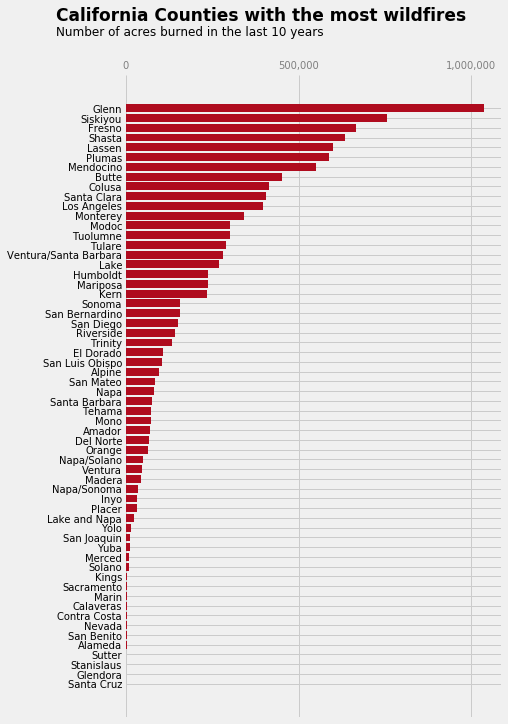

In [279]:
# view this in a barplot
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight') # using the matplotlib style
fig, ax = plt.subplots(figsize=(6, 11))

ax.barh(county_sorted['county'],
        county_sorted['acres'],
        color='#af0b1e')

# Add a title
ax.text(x=-200000, y=68, s='California Counties with the most wildfires',
        size=17, weight='bold')
# Add a subtitle
ax.text(x=-200000, y=66.5, s='Number of acres burned in the last 10 years',
        size=12)

# create a for loop to remove all the spines
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

# modify the x-axis tick labels
ax.set_xticks([0, 500000,  1000000])    
ax.set_xticklabels(['0', '500,000', '1,000,000'])
ax.xaxis.tick_top()
ax.tick_params(left=False, top=False, axis='x', colors='grey', direction = 'out', length=1, labelsize=10)

# y-axis label size
ax.tick_params(axis='y', labelsize=10)
plt.show()



## Observe if there is a relationship between temperature and precipitation.

In [328]:
# correlation of temp and the other columns in weather
weather.corr()['temp'].sort_values(ascending=False)

temp      1.000000
year      0.032067
inches   -0.548667
Name: temp, dtype: float64

We see there is a moderate negative correlation (-0.55) between temperature and precipitation.

### Correlation of temp and precipitation is not direct
The relationship can be observed on a scatterplot for each year showing how the relationship changes differs for the last 12 years. It can be observed that when the temperature is above 60°F there is always low precipitation. However, depending on the year, there can be low precipitation even when the temperature is low as in year 2013, 2020 and 2021. 

All three variables (year, temp and precipitation) can be overlayed. This helps visualize an overlay of all the years and looks like 2017 & 2019 had the most wettest seasons compared to the other years.

<Figure size 576x576 with 0 Axes>

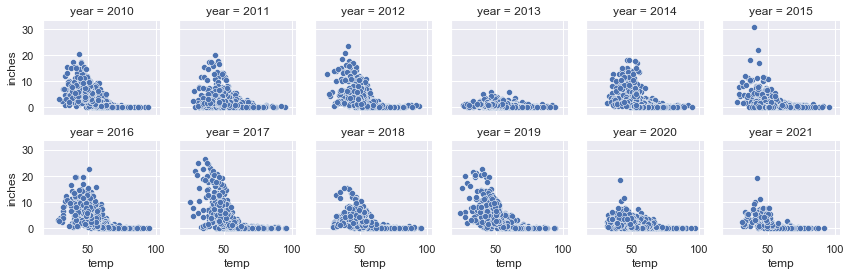

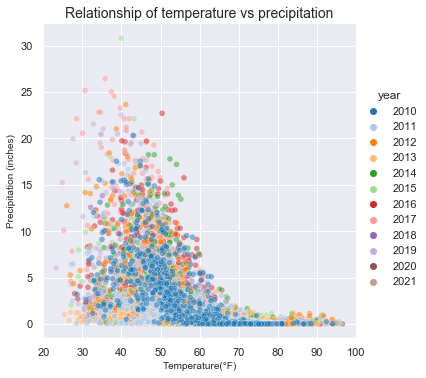

In [346]:
import seaborn as sns
sns.set_theme()
sns.color_palette("tab20", 12)

# Set figure size (width, height) in inches
plt.figure(figsize = ( 8 , 8 ))

g = sns.FacetGrid(weather, col="year", col_wrap=6, height=2)
g.map(sns.scatterplot, 'temp', 'inches')

sns.relplot(data=weather, x='temp', y='inches', hue = 'year', palette ='tab20', alpha=0.5)

# Add a title
plt.title("Relationship of temperature vs precipitation", size = 14)

# Set label for x-axis
plt.xlabel( "Temperature(°F)" , size = 10 )
  
# Set label for y-axis
plt.ylabel( "Precipitation (inches)" , size = 10 )
            
plt.show()

## Observing clusters in the data

In [402]:
# generate the yearly average temp and precipitation for the counties
weather_avg_yr = weather.groupby(['location', 'year']).mean().reset_index()
weather_avg_yr.head()

location  year       temp    inches  month
0  Alameda   2010  58.283333  1.930833    6.5
1  Alameda   2011  57.925000  1.210833    6.5
2  Alameda   2012  59.258333  1.731667    6.5
3  Alameda   2013  59.466667  0.423333    6.5
4  Alameda   2014  61.950000  1.656667    6.5

In [404]:
# remove whitespaces from the county column
#fires_total['county'] = fires_total['county'].str.strip()
weather_avg_yr['location'] = weather_avg_yr['location'].str.strip()

In [419]:
# Generate a dataframe with the total acres burned per year
fires_total_yr = wildfires.groupby(['county', 'year']).sum().reset_index()
# add column stating wildfire
fires_total_yr['wildfire'] = 'wildfire'
fires_total_yr.head()

county  year  acres  month  wildfire
0  Alameda  2015   2700      8  wildfire
1   Alpine  2020  26759      8  wildfire
2   Alpine  2021  71152     20  wildfire
3   Amador  2015  70868      9  wildfire
4    Butte  2013   2264      8  wildfire

In [430]:
# check to make sure the county column matches the location column before merging the dataframes.
fires_total_yr['county'][0] == weather_avg_yr['location'][0]

True

In [530]:
# change the year column to an interger
fires_total_yr['year'] = fires_total_yr['year'].astype(int)

In [422]:
# merge above dataframe with the weather_avg_yr
df4 = pd.merge(left=weather_avg_yr, right=fires_total_yr, how='left', left_on =['location', 'year'], right_on=['county','year'])
df4

location  year       temp    inches  month_x           county  \
0            Alameda  2010  58.283333  1.930833      6.5              NaN   
1            Alameda  2011  57.925000  1.210833      6.5              NaN   
2            Alameda  2012  59.258333  1.731667      6.5              NaN   
3            Alameda  2013  59.466667  0.423333      6.5              NaN   
4            Alameda  2014  61.950000  1.656667      6.5              NaN   
5            Alameda  2015  61.050000  0.865833      6.5          Alameda   
6            Alameda  2016  60.366667  1.879167      6.5              NaN   
7            Alameda  2017  60.500000  2.080833      6.5              NaN   
8            Alameda  2018  59.808333  1.380833      6.5              NaN   
9            Alameda  2019  59.683333  1.857500      6.5              NaN   
10           Alameda  2020  61.633333  0.701667      6.5              NaN   
11           Alameda  2021  57.450000  0.940000      3.5              NaN   
12            Alpine  2010  42.900000  4.124167      6.5              NaN   
13            Alpine  2011  42.691667  2.798333      6.5              NaN   
14            Alpine  2012  45.100000  2.970833      6.5              NaN   
15            Alpine  2013  44.600000  1.129167      6.5              NaN   
16            Alpine  2014  46.800000  2.448333      6.5              NaN   
17            Alpine  2015  46.350000  2.530000      6.5              NaN   
18            Alpine  2016  45.900000  3.302500      6.5              NaN   
19            Alpine  2017  45.400000  5.353333      6.5              NaN   
20            Alpine  2018  45.716667  2.683333      6.5              NaN   
21            Alpine  2019  43.466667  3.934167      6.5              NaN   
22            Alpine  2020  46.316667  1.697500      6.5           Alpine   
23            Alpine  2021  41.666667  2.318333      3.5           Alpine   
24            Amador  2010  56.608333  4.339167      6.5              NaN   
25            Amador  2011  56.133333  2.760833      6.5              NaN   
26            Amador  2012  58.500000  3.383333      6.5              NaN   
27            Amador  2013  59.133333  1.020833      6.5              NaN   
28            Amador  2014  60.950000  2.607500      6.5              NaN   
29            Amador  2015  60.350000  2.221667      6.5           Amador   
30            Amador  2016  59.233333  3.417500      6.5              NaN   
31            Amador  2017  59.508333  4.661667      6.5              NaN   
32            Amador  2018  59.725000  2.836667      6.5              NaN   
33            Amador  2019  57.808333  4.054167      6.5              NaN   
34            Amador  2020  60.441667  1.693333      6.5              NaN   
35            Amador  2021  56.050000  2.268333      3.5              NaN   
36             Butte  2010  58.575000  4.825000      6.5              NaN   
37             Butte  2011  58.175000  3.227500      6.5              NaN   
38             Butte  2012  59.833333  4.455000      6.5              NaN   
39             Butte  2013  60.441667  1.015833      6.5            Butte   
40             Butte  2014  62.433333  3.643333      6.5              NaN   
41             Butte  2015  61.950000  1.728333      6.5              NaN   
42             Butte  2016  60.808333  4.663333      6.5              NaN   
43             Butte  2017  61.141667  4.700833      6.5            Butte   
44             Butte  2018  61.033333  2.875833      6.5            Butte   
45             Butte  2019  60.225000  5.008333      6.5              NaN   
46             Butte  2020  62.208333  1.596667      6.5            Butte   
47             Butte  2021  58.583333  2.218333      3.5            Butte   
48         Calaveras  2010  57.041667  4.228333      6.5              NaN   
49         Calaveras  2011  56.525000  2.675833      6.5              NaN   
50         Calaveras  2012  58.975000  3.149167      6.5        Calaveras   
51      

In [423]:
# change all Nan in acres to 0
df4['acres'] = df4['acres'].fillna(0)
# change all NaN in wildfire to 'no wildfire'
df4['wildfire'] = df4['wildfire'].replace(np.nan, 'no wildfire')
df4.head(7)

location  year       temp    inches  month_x   county   acres  month_y  \
0  Alameda  2010  58.283333  1.930833      6.5      NaN     0.0      NaN   
1  Alameda  2011  57.925000  1.210833      6.5      NaN     0.0      NaN   
2  Alameda  2012  59.258333  1.731667      6.5      NaN     0.0      NaN   
3  Alameda  2013  59.466667  0.423333      6.5      NaN     0.0      NaN   
4  Alameda  2014  61.950000  1.656667      6.5      NaN     0.0      NaN   
5  Alameda  2015  61.050000  0.865833      6.5  Alameda  2700.0      8.0   
6  Alameda  2016  60.366667  1.879167      6.5      NaN     0.0      NaN   

      wildfire  
0  no wildfire  
1  no wildfire  
2  no wildfire  
3  no wildfire  
4  no wildfire  
5     wildfire  
6  no wildfire

In [424]:
# get rid of unnecessary columns
df4 = df4.iloc[:, [0,1,2,3,6,8]]
df4.head(7)

location  year       temp    inches   acres     wildfire
0  Alameda  2010  58.283333  1.930833     0.0  no wildfire
1  Alameda  2011  57.925000  1.210833     0.0  no wildfire
2  Alameda  2012  59.258333  1.731667     0.0  no wildfire
3  Alameda  2013  59.466667  0.423333     0.0  no wildfire
4  Alameda  2014  61.950000  1.656667     0.0  no wildfire
5  Alameda  2015  61.050000  0.865833  2700.0     wildfire
6  Alameda  2016  60.366667  1.879167     0.0  no wildfire

In [425]:
df4

location  year       temp    inches      acres     wildfire
0            Alameda  2010  58.283333  1.930833        0.0  no wildfire
1            Alameda  2011  57.925000  1.210833        0.0  no wildfire
2            Alameda  2012  59.258333  1.731667        0.0  no wildfire
3            Alameda  2013  59.466667  0.423333        0.0  no wildfire
4            Alameda  2014  61.950000  1.656667        0.0  no wildfire
5            Alameda  2015  61.050000  0.865833     2700.0     wildfire
6            Alameda  2016  60.366667  1.879167        0.0  no wildfire
7            Alameda  2017  60.500000  2.080833        0.0  no wildfire
8            Alameda  2018  59.808333  1.380833        0.0  no wildfire
9            Alameda  2019  59.683333  1.857500        0.0  no wildfire
10           Alameda  2020  61.633333  0.701667        0.0  no wildfire
11           Alameda  2021  57.450000  0.940000        0.0  no wildfire
12            Alpine  2010  42.900000  4.124167        0.0  no wildfire
13            Alpine  2011  42.691667  2.798333        0.0  no wildfire
14            Alpine  2012  45.100000  2.970833        0.0  no wildfire
15            Alpine  2013  44.600000  1.129167        0.0  no wildfire
16            Alpine  2014  46.800000  2.448333        0.0  no wildfire
17            Alpine  2015  46.350000  2.530000        0.0  no wildfire
18            Alpine  2016  45.900000  3.302500        0.0  no wildfire
19            Alpine  2017  45.400000  5.353333        0.0  no wildfire
20            Alpine  2018  45.716667  2.683333        0.0  no wildfire
21            Alpine  2019  43.466667  3.934167        0.0  no wildfire
22            Alpine  2020  46.316667  1.697500    26759.0     wildfire
23            Alpine  2021  41.666667  2.318333    71152.0     wildfire
24            Amador  2010  56.608333  4.339167        0.0  no wildfire
25            Amador  2011  56.133333  2.760833        0.0  no wildfire
26            Amador  2012  58.500000  3.383333        0.0  no wildfire
27            Amador  2013  59.133333  1.020833        0.0  no wildfire
28            Amador  2014  60.950000  2.607500        0.0  no wildfire
29            Amador  2015  60.350000  2.221667    70868.0     wildfire
30            Amador  2016  59.233333  3.417500        0.0  no wildfire
31            Amador  2017  59.508333  4.661667        0.0  no wildfire
32            Amador  2018  59.725000  2.836667        0.0  no wildfire
33            Amador  2019  57.808333  4.054167        0.0  no wildfire
34            Amador  2020  60.441667  1.693333        0.0  no wildfire
35            Amador  2021  56.050000  2.268333        0.0  no wildfire
36             Butte  2010  58.575000  4.825000        0.0  no wildfire
37             Butte  2011  58.175000  3.227500        0.0  no wildfire
38             Butte  2012  59.833333  4.455000        0.0  no wildfire
39             Butte  2013  60.441667  1.015833     2264.0     wildfire
40             Butte  2014  62.433333  3.643333        0.0  no wildfire
41             Butte  2015  61.950000  1.728333        0.0  no wildfire
42             Butte  2016  60.808333  4.663333        0.0  no wildfire
43             Butte  2017  61.141667  4.700833    24617.0     wildfire
44             Butte  2018  61.033333  2.875833   153336.0     wildfire
45             Butte  2019  60.225000  5.008333        0.0  no wildfire
46             Butte  2020  62.208333  1.596667    19609.0     wildfire
47             Butte  2021  58.583333  2.218333   253052.0     wildfire
48         Calaveras  2010  57.041667  4.228333        0.0  no wildfire
49         Calaveras  2011  56.525000  2.675833        0.0  no wildfire
50         Calaveras  2012  58.975000  3.149167     1137.0     wildfire
51         Calaveras  2013  59.300000  0.928333        0.0  no wildfire
52         Calaveras  2014  61.133333  2.463333        0.0  no wildfire
53         Calaveras  2015  60.650000  2.105000        0.0  no wildfire
54         Calaveras  2016  59.533333  3.374167     

## Possible categories to observe clusters
Plotting the data in the above dataframe can help us observe categories that could be used to cluster the data into wildfire or not wildfire potential. The below graph displays scatter plots for different variables in the data frame. The diagonal plots are layered kernel density estimate (KDE), which can be used to show the distribution of the variables. 

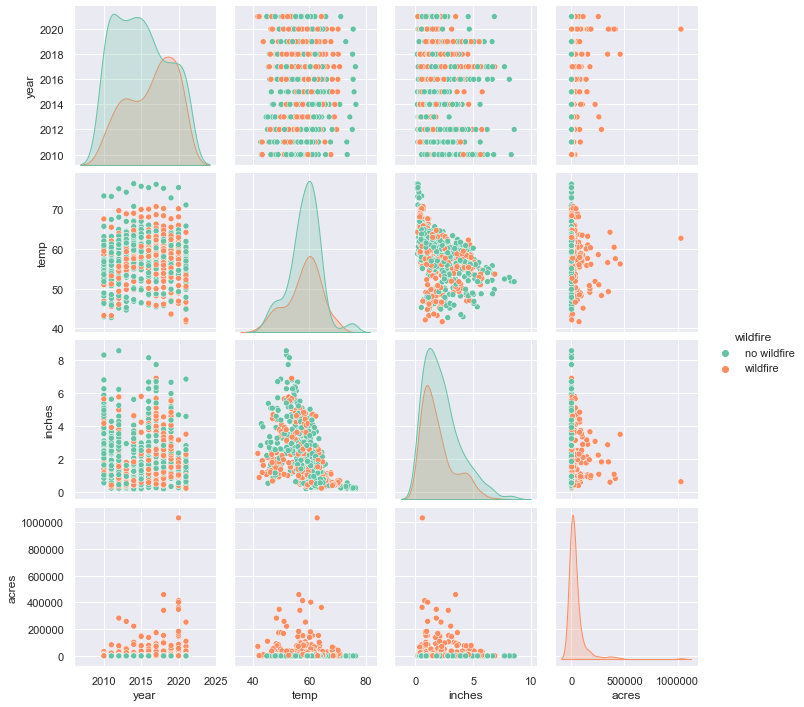

In [426]:
sns.pairplot(df4, hue="wildfire", palette="Set2", diag_kind="kde", height=2.5,)
plt.show()

We do not see that the variables plotted provide a good separation between observed wildfires. This shows that performing a K-means algorithm would not provide any accurate prediction as to whether a wildfire would occur based on temperature and precipitation. 


## K-means with scikit-learn
However, if we did see that the variables were better separated we could proceed with generating a k-means cluster.


In [466]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

Obtain the numeric columns of interest you want to train your k-means algorithm on. This would be the temperature, precipitation and the acres burned columns.

In [523]:
# obtain the temp, precip and acres columns (numeric columns) from df4
df = np.array(df4.iloc[:,2:5])
df

array([[5.82833333e+01, 1.93083333e+00, 0.00000000e+00],
       [5.79250000e+01, 1.21083333e+00, 0.00000000e+00],
       [5.92583333e+01, 1.73166667e+00, 0.00000000e+00],
       ...,
       [6.08833333e+01, 4.34583333e+00, 0.00000000e+00],
       [6.29500000e+01, 1.50166667e+00, 1.31100000e+03],
       [5.93166667e+01, 1.83666667e+00, 0.00000000e+00]])

From the dataframe df4 wildfire columns each row representing a data point is labeled with whether there was a wildfire in the county for the year. This column is used to label each data point to compare with the predicted clustering later on.

In [518]:
# store the wildfire label names in an array
label_names = np.array(df4['wildfire'])
label_names

array(['no wildfire', 'no wildfire', 'no wildfire', 'no wildfire',
       'no wildfire', 'wildfire', 'no wildfire', 'no wildfire',
       'no wildfire', 'no wildfire', 'no wildfire', 'no wildfire',
       'no wildfire', 'no wildfire', 'no wildfire', 'no wildfire',
       'no wildfire', 'no wildfire', 'no wildfire', 'no wildfire',
       'no wildfire', 'no wildfire', 'wildfire', 'wildfire',
       'no wildfire', 'no wildfire', 'no wildfire', 'no wildfire',
       'no wildfire', 'wildfire', 'no wildfire', 'no wildfire',
       'no wildfire', 'no wildfire', 'no wildfire', 'no wildfire',
       'no wildfire', 'no wildfire', 'no wildfire', 'wildfire',
       'no wildfire', 'no wildfire', 'no wildfire', 'wildfire',
       'wildfire', 'no wildfire', 'wildfire', 'wildfire', 'no wildfire',
       'no wildfire', 'wildfire', 'no wildfire', 'no wildfire',
       'no wildfire', 'no wildfire', 'no wildfire', 'no wildfire',
       'no wildfire', 'wildfire', 'no wildfire', 'no wildfire',
       'no wi

In [519]:
# to use the lable_names in the evaluation we need to convert them to integers using the LabelEncoder function
label_encoder = LabelEncoder()
label_named = label_encoder.fit_transform(label_names)
label_named

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [520]:
# we can view the classes that correspond to the label_named
label_encoder.classes_

array(['no wildfire', 'wildfire'], dtype=object)

In [521]:
# store the length of the label_encoder.classes_
n_clusters = len(label_encoder.classes_)

Beacause we have multi-dimensional data (3 variables), we must perform principal component analysis and plot the data points according to the first two principal compontnet coordinates. This helps to visualize all our variables on a 2D plot. 

However, before dimensionally reduction we must first scale the values of the different features. This is because temp and precipitaion as well as acres are all measured on different scales (degrees, inches and acres). So it is important to **scale the features to the same range**. This is performed with the `MinMaxScaler()` function, which will take 0-1 as the uniform value range across all features.

In [471]:
# create a preprocessing pipeline that will first implement the StandardScaler and then the PCA analysis
preprocessor = Pipeline(
     [
         ("scaler", MinMaxScaler()),
         ("pca", PCA(n_components=2, random_state=42)),
         ]
     )

In [478]:
# build the kmeans clusting pipeline
clustering = Pipeline(
    [
        (
            "kmeans",
            KMeans(
                n_clusters=n_clusters,
                init="k-means++",
                n_init=50,
                max_iter=500,
                random_state=42,
                ),
            ),
        ]
    )

In [479]:
# combine both pipelines to generate a chained larger pipeline
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clustering", clustering)
    ])

In [525]:
# perform the pipeline with .fit() on the data.
pipe.fit(df)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clustering',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=2, n_init=50,
                                         random_state=42))]))])

In [526]:
# calculate teh silhouette coefficient {ranges from 0 to 1} where 0 indicates significantly overlapping cluters
# and 1 indicates clusters are well-separated.
preprocessed_data = pipe["preprocessor"].transform(df)
predicted_labels = pipe["clustering"]["kmeans"].labels_
silhouette_score(preprocessed_data, predicted_labels)

0.4514519911684914

In [527]:
# ARI score of 0 indicates that cluster labels are randomly assigned, and an 
# ARI score of 1 means that the true labels and predicted labels form identical clusters.
adjusted_rand_score(label_named, predicted_labels)

-0.0030078524332383997

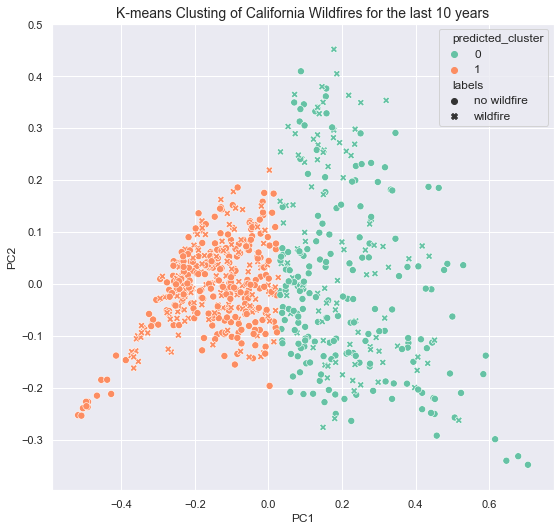

In [529]:
# Save the PCA data into a dataframe
pca_df = pd.DataFrame(
    pipe['preprocessor'].transform(df),
    columns = ["PC1", "PC2"])
pca_df['predicted_cluster'] = pipe['clustering']['kmeans'].labels_
pca_df['labels'] = label_encoder.inverse_transform(label_named)

# plot the dataframe
plt.figure(figsize=(8, 8))
sns.scatterplot("PC1", "PC2", s=50, data = pca_df, hue="predicted_cluster", style="labels", palette = "Set2")
# Add a title
plt.title("K-means Clusting of California Wildfires for the last 10 years", size = 14)

plt.show()

## Making predictions
If we had observed better separation between observed wildfires and no wildfires we could use the model that was trained on previous year's temp and precipitation to predict if a wildfire were to occurr. 

Below is the approach to how this would work.

In [ ]:
# take the new observation of temperature and precipitation
new_observation = [[58.6, 2.2]]
# use the model to predict which cluster the new observation would fall into. The result would be somthing like
# array([0]) indicating the the cluster or centroid 0.
predicted = pipe['clustering']['kmeans'].predict(new_observation)
predicted

# Conclusion

The k-means clustering above shows that it was unable to differentiate between the occurrance of wildfires in California using temperature and precipitation alone. 

This shows that:
1. Additional wildfire data spanning a longer timeframe may be helpful. Also taking all wildfires that occurred, not just ones that bured more than 1,000 acres, could better model the prediction.
2. Additional or alternate variables such as humidity, and how the fire started (lightning, power lines or people) may help in observing more distinct clusters. 

It has been published that 84% of all wildfires are human generated [1](https://www.pnas.org/content/114/11/2946). Additionally, humidity has been shown to be a better indicator in modeling predictions for wildfires than precipitation [2](https://www.pnas.org/content/115/36/E8349#sec-6), [3](https://www.biorxiv.org/content/10.1101/384115v2.abstract).